- Memory ISSUES
- Regularization

In [1]:
import os
os.environ['FASTAI_TB_CLEAR_FRAMES']="1"
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
from fastai.text import * 

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path

PosixPath('/home/ubuntu/.fastai/data/imdb_sample')

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')

### LM

In [6]:
doc(language_model_learner)

In [ ]:
learn = language_model_learner(data_lm, Transformer, pretrained=False)

In [ ]:
learn.model

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-04


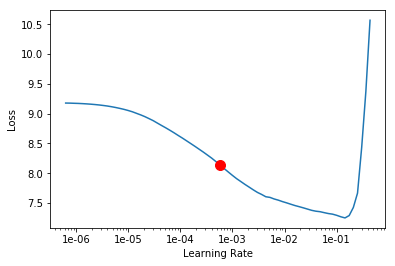

In [11]:
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(10, 5e-4)

epoch,train_loss,valid_loss,accuracy
1,6.111741,5.884340,0.083195
2,6.121155,5.897893,0.083195
3,6.128734,5.907024,0.083195


KeyboardInterrupt: 

In [7]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy
1,4.168019,3.922085,0.288106


In [8]:
learn.save_encoder('ft_enc')

In [9]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(8866, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(8866, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=8866, bias=True)
    (output_dp): RNNDropout()
  )
)

In [10]:
learn.model[1].decoder.weight

Parameter containing:
tensor([[ 0.1500,  0.0511, -0.1269,  ...,  0.0057, -0.0233, -0.2449],
        [ 0.2079, -0.0437,  0.1241,  ..., -0.0269, -0.0769, -0.1537],
        [-0.7935,  0.1657,  0.0122,  ..., -0.3044, -0.0847, -0.0514],
        ...,
        [ 0.2525, -0.0366,  0.2212,  ..., -0.1012, -0.0522, -0.1254],
        [ 0.2671, -0.1452,  0.1510,  ..., -0.1040, -0.0185, -0.4618],
        [ 0.3107, -0.0108,  0.0955,  ...,  0.0359, -0.0326, -0.1716]],
       device='cuda:0', requires_grad=True)

### Clas

In [8]:
from fastai.text.models.transformer import init_transformer, tfmer_clas_config
from fastai.text.learner import _model_meta

In [23]:
tfmer_clas_config

{'ctx_len': 100,
 'n_layers': 3,
 'n_heads': 3,
 'd_model': 768,
 'd_head': 64,
 'd_inner': 3072,
 'resid_p': 0.1,
 'attn_p': 0.1,
 'ff_p': 0.1,
 'embed_p': 0.1,
 'output_p': 0.0,
 'bias': True,
 'scale': True,
 'act': <Activation.GeLU: 3>,
 'double_drop': False,
 'init': <function fastai.text.models.transformer.init_transformer(m)>,
 'mask': False}

In [24]:
tfmer_clas_config['ctx_len'] = 100
tfmer_clas_config['n_layers'] = 3
tfmer_clas_config['n_heads'] = 3
tfmer_clas_config['d_model'] = 512
tfmer_clas_config['d_head'] = 1024

In [33]:
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=16)

In [34]:
# learn = text_classifier_learner(data_clas, Transformer, config=tfmer_clas_config, pretrained=False)
learn = text_classifier_learner(data_clas, Transformer, pretrained=False)

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.79E-02


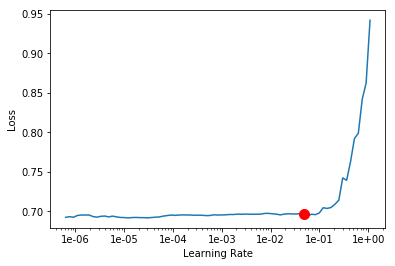

In [36]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.708286,0.698890,0.482587


In [38]:
learn.predict("This was a great movie!")

(Category negative, tensor(0), tensor([0.5389, 0.4611]))